In [48]:
# Import python modules.
from PIL import Image
import numpy as np
import tensorflow as tf
tf.compat.v1.enable_eager_execution()
print("Eager: ", tf.executing_eagerly())
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import os

Eager:  True


In [58]:
# Clone the project repo.
! rm -r neural_style_transfer
! git clone https://github.com/h1wingo/neural_style_transfer.git

Cloning into 'neural_style_transfer'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 24 (delta 0), reused 1 (delta 0), pack-reused 21
Unpacking objects: 100% (24/24), done.


In [59]:
# Load the NST modle.
nst_model = tf.compat.v2.saved_model.load("./neural_style_transfer/nst_model/")

In [60]:
! ls neural_style_transfer/styles

picasso.jpg  rainy_trail.jpg  starry_night.jpg	the_scream.jpg


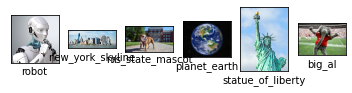

In [61]:
# Display the content images.
content_files = [os.path.join("neural_style_transfer/content", f) for f in os.listdir("neural_style_transfer/content")]
fig, ax = plt.subplots(1, len(content_files))
content_images_dir = {}
for idx in range(len(content_files)):
  content_image_path = content_files[idx]
  content_image = plt.imread(content_image_path)
  ax[idx].set_xticks([])
  ax[idx].set_yticks([])
  image_name = content_image_path.split("/")[-1].split(".")[0]
  content_images_dir[image_name] = content_image
  ax[idx].set_xlabel(image_name)
  ax[idx].imshow(content_image)

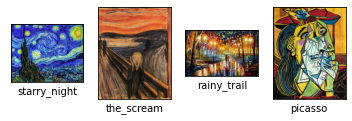

In [62]:
# Display the style images.
style_files = [os.path.join("neural_style_transfer/styles", f) for f in os.listdir("neural_style_transfer/styles")]
fig, ax = plt.subplots(1, len(style_files))
style_images_dir = {}
for idx in range(len(style_files)):
  style_image_path = style_files[idx]
  style_image = plt.imread(style_image_path)
  ax[idx].set_xticks([])
  ax[idx].set_yticks([])
  image_name = style_image_path.split("/")[-1].split(".")[0]
  style_images_dir[image_name] = style_image
  ax[idx].set_xlabel(image_name)
  ax[idx].imshow(style_image)

In [63]:
# Set the style image that you want to use and the content image.
style_image = style_images_dir["rainy_trail"].astype(np.float32)[np.newaxis, ...] / 255.0
content_image = content_images_dir["big_al"].astype(np.float32)[np.newaxis, ...] / 255.0

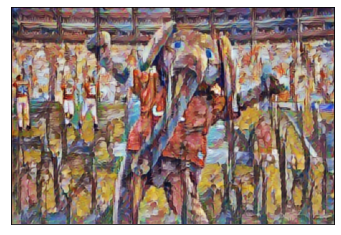

In [64]:
# Create the NST output image.
output_image = nst_model(tf.constant(content_image), tf.constant(style_image))[0][0]
plt.xticks([])
plt.yticks([])
plt.imshow(output_image)